# Simulation de Monte Carlo du modèle de Kyle

## Introduction

Dans ce notebook, nous allons simuler un **modèle simple discret de Kyle** en utilisant une méthode de **Monte Carlo**. L'objectif est de comprendre comment un **trader informé** (insider), un groupe de **traders bruités** (noise traders), et les **market makers** interagissent pour former le **prix du marché**.

### Hypothèses du modèle :

- La valeur de l'actif $V$ sera révélée au temps 1.
- L'insider connaît $V$ au temps 0 et effectue une transaction en fonction de cette information.
- Les traders bruités ont une demande aléatoire $\nu \sim N(0, \sigma_\nu^2)$.
- Les **market makers**, qui ne connaissent pas $V$, observent la demande totale $Y = \theta + \nu$ et ajustent le prix $h(y)$ pour que leur profit espéré soit nul.

## Détail du modèle :

### Valeur de l'actif $V$ :
La valeur de l'actif $V$ est inconnue des market makers, mais elle est connue par l'insider. $V$ est modélisé comme une variable aléatoire suivant une distribution normale :
$$V \sim N(0, \sigma_V^2)$$

### Demande des traders bruités $\nu$ :
Les traders bruités n'ont pas d'information sur $V$. Leur demande est aléatoire et suit une loi normale :
$$\nu \sim N(0, \sigma_\nu^2)$$

### Quantité échangée par l'insider $\theta$ :
L'insider ajuste la quantité échangée $\theta$ en fonction de la valeur de l'actif $V$. Une relation linéaire existe entre $\theta$ et $V$ :
$$\theta = \beta V$$
Où $\beta = \frac{\sigma_\nu}{\sigma_V}$, ce qui représente la relation entre les informations privées de l'insider et la volatilité des traders bruités.

### Demande totale $Y$ :
Les market makers ne connaissent pas $\theta$ ni $\nu$ individuellement, mais ils observent la demande totale $Y$, qui est la somme des deux :
$$Y = \theta + \nu$$

### Prix fixé par les market makers $h(Y)$ :
Les market makers ajustent le prix $h(Y)$ en fonction de la demande totale $Y$ observée. Le prix est donné par la règle :
$$h(Y) = \lambda Y$$
Où $\lambda = \frac{\sigma_V}{2\sigma_\nu}$ est le **lambda de Kyle**, qui mesure la sensibilité du prix à la demande totale.

### Profit de l'insider :
Le profit de l'insider est calculé comme la différence entre la valeur réelle de l'actif $V$ et le prix fixé par les market makers $h(Y)$, multipliée par la quantité échangée $\theta$ :
$$\text{Profit de l'insider} = (\theta)(V - h(Y))$$

## Étapes de la simulation Monte Carlo :

1. **Génération de valeurs aléatoires** : Nous générons des valeurs aléatoires pour $V$ et $\nu$ en suivant les lois normales définies ci-dessus.
2. **Calcul de la demande totale $Y$** : Nous calculons $Y = \theta + \nu$ où $\theta = \beta V$.
3. **Calcul du prix de marché** : Les market makers ajustent le prix $h(Y)$ selon la relation $h(Y) = \lambda Y$.
4. **Calcul du profit de l'insider** : Nous calculons le profit de l'insider en utilisant $(V - h(Y)) \times \theta$.
5. **Répétition des étapes pour plusieurs simulations** : Nous effectuons plusieurs simulations pour observer la distribution des prix de marché et des profits.

## Résultats :

- Nous analyserons les **prix de marché simulés** et la **distribution des profits de l'insider** à travers plusieurs simulations de Monte Carlo.
- Cela nous permettra d'étudier l'effet de l'information privée et du bruit des traders sur la formation des prix.



Prix de marché moyen : 0.0009436743951174378
Profit moyen de l'insider : 0.5100347301918775


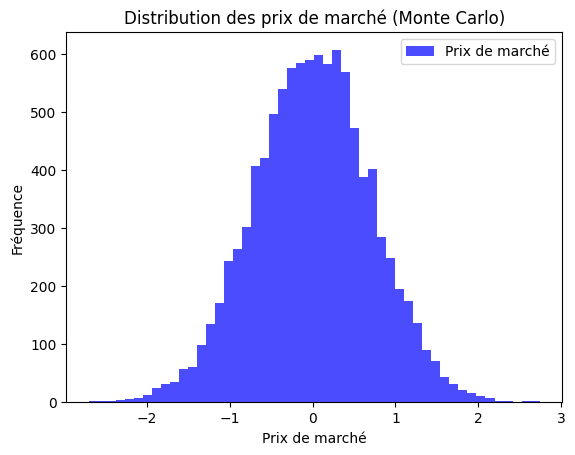

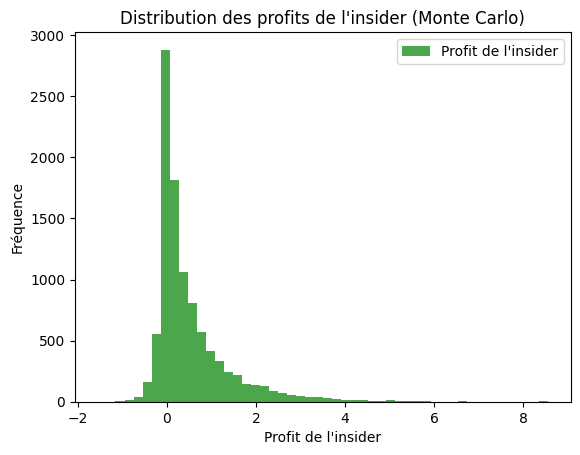

In [3]:
import numpy as np
import matplotlib.pyplot as plt


sigma_V = 1.0  # Écart-type de V 
sigma_nu = 1.0  # Écart-type de la demande des noise traders
n_simulations = 10000  

market_prices = []
insider_profits = []


for i in range(n_simulations):
    
    # Étape 1 : Générer les valeurs aléatoires pour V et nu
    V = np.random.normal(0, sigma_V)  # Valeur réelle de l'actif
    nu = np.random.normal(0, sigma_nu)  # Demande des noise traders
    
    # Étape 2 : Calculer theta, la quantité échangée par l'insider
    beta = sigma_nu / sigma_V
    theta = beta * V  # Quantité échangée par l'insider
    
    # Étape 3 : Calculer la demande totale Y
    Y = theta + nu  
    
    # Étape 4 : Calculer le prix de marché en fonction de Y
    lambda_kyle = sigma_V / (2 * sigma_nu)
    market_price = lambda_kyle * Y  
    
    # Étape 5 : Calculer le profit de l'insider
    profit_insider = (V - market_price) * theta 

    market_prices.append(market_price)
    insider_profits.append(profit_insider)

# Calculer la moyenne des prix de marché et des profits de l'insider
mean_market_price = np.mean(market_prices)
mean_insider_profit = np.mean(insider_profits)

# Afficher les résultats
print(f"Prix de marché moyen : {mean_market_price}")
print(f"Profit moyen de l'insider : {mean_insider_profit}")

# Tracer l'histogramme des prix de marché simulés
plt.hist(market_prices, bins=50, color='blue', alpha=0.7, label="Prix de marché")
plt.title("Distribution des prix de marché (Monte Carlo)")
plt.xlabel("Prix de marché")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

# Tracer l'histogramme des profits de l'insider
plt.hist(insider_profits, bins=50, color='green', alpha=0.7, label="Profit de l'insider")
plt.title("Distribution des profits de l'insider (Monte Carlo)")
plt.xlabel("Profit de l'insider")
plt.ylabel("Fréquence")
plt.legend()
plt.show()


Profit moyen des market makers : 0.002940506411666974


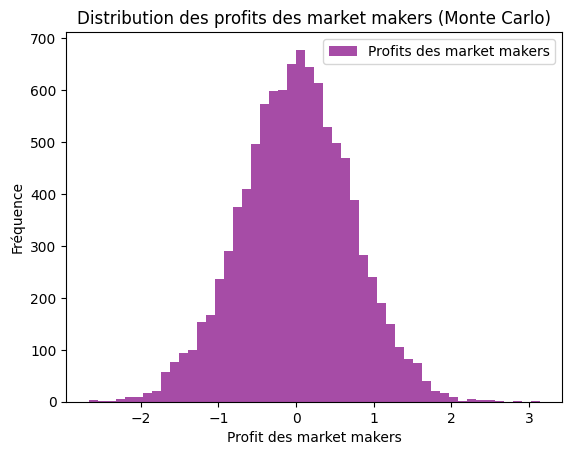

In [4]:
n_simulations = 10000  # Nombre de simulations
sigma_V = 1.0  # Volatilité de la valeur de l'actif
sigma_nu = 1.0  # Volatilité des noise traders

market_maker_profits = []

# Simulation de Monte Carlo
for i in range(n_simulations):
    # Générer V et nu selon les paramètres donnés
    V = np.random.normal(0, sigma_V) 
    nu = np.random.normal(0, sigma_nu)  

    # Calculer theta, la quantité échangée par l'insider
    beta = sigma_nu / sigma_V
    theta = beta * V

    # Calculer la demande totale Y
    Y = theta + nu

    # Calculer le lambda de Kyle et le prix de marché fixé par les market makers
    lambda_kyle = sigma_V / (2 * sigma_nu)
    market_price = lambda_kyle * Y

    # Calculer le profit des market makers
    profit_market_maker = market_price - V  # Différence entre le prix fixé et la valeur réelle de l'actif

    market_maker_profits.append(profit_market_maker)

# Calculer la moyenne des profits des market makers
mean_market_maker_profit = np.mean(market_maker_profits)
print(f"Profit moyen des market makers : {mean_market_maker_profit}")

# Afficher l'histogramme des profits des market makers
plt.hist(market_maker_profits, bins=50, color='purple', alpha=0.7, label="Profits des market makers")
plt.title("Distribution des profits des market makers (Monte Carlo)")
plt.xlabel("Profit des market makers")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

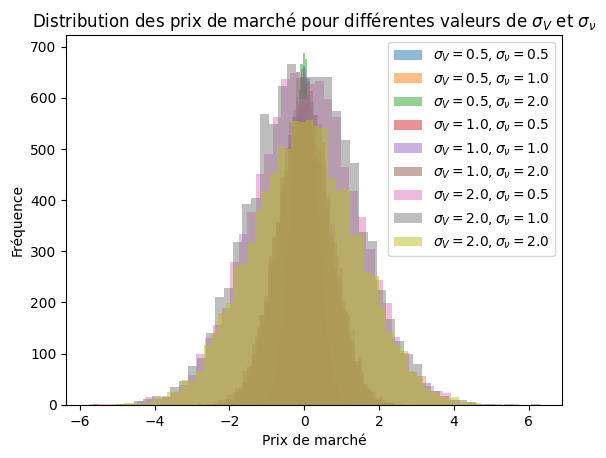

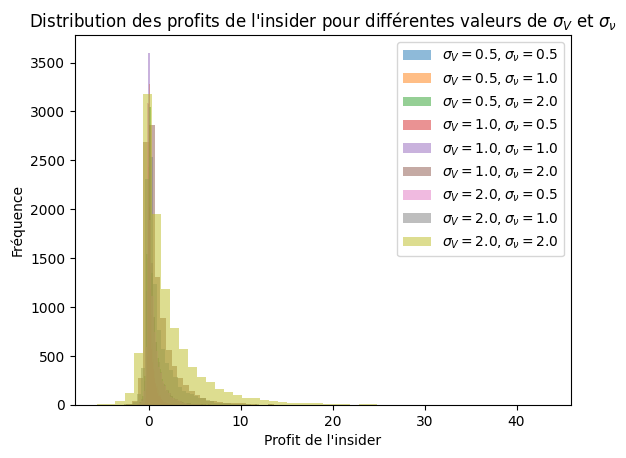

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
n_simulations = 10000  # Nombre de simulations
sigma_V_values = [0.5, 1.0, 2.0]  # Différentes volatilités pour V
sigma_nu_values = [0.5, 1.0, 2.0]  # Différentes volatilités pour les noise traders

# Stocker les résultats pour chaque combinaison de paramètres
results = {}

# Simulation pour chaque combinaison de sigma_V et sigma_nu
for sigma_V in sigma_V_values:
    for sigma_nu in sigma_nu_values:
        market_prices = []
        insider_profits = []
        
        for i in range(n_simulations):
            # Générer V et nu selon les paramètres donnés
            V = np.random.normal(0, sigma_V)  # Valeur réelle de l'actif
            nu = np.random.normal(0, sigma_nu)  # Demande des noise traders

            # Calculer theta, la quantité échangée par l'insider
            beta = sigma_nu / sigma_V
            theta = beta * V

            # Calculer la demande totale Y
            Y = theta + nu

            # Calculer le lambda de Kyle et le prix de marché
            lambda_kyle = sigma_V / (2 * sigma_nu)
            market_price = lambda_kyle * Y

            # Calculer le profit de l'insider
            profit_insider = (V - market_price) * theta

            # Stocker les résultats
            market_prices.append(market_price)
            insider_profits.append(profit_insider)

        # Calculer les moyennes
        mean_market_price = np.mean(market_prices)
        mean_insider_profit = np.mean(insider_profits)

        # Stocker les résultats pour chaque combinaison de paramètres
        results[(sigma_V, sigma_nu)] = {
            'market_prices': market_prices,
            'insider_profits': insider_profits,
            'mean_market_price': mean_market_price,
            'mean_insider_profit': mean_insider_profit
        }

# Graphiques des distributions des prix de marché
for sigma_V in sigma_V_values:
    for sigma_nu in sigma_nu_values:
        plt.hist(results[(sigma_V, sigma_nu)]['market_prices'], bins=50, alpha=0.5, 
                 label=f'$\\sigma_V={sigma_V}, \\sigma_\\nu={sigma_nu}$')

plt.title("Distribution des prix de marché pour différentes valeurs de $\sigma_V$ et $\sigma_\\nu$")
plt.xlabel("Prix de marché")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

# Graphiques des distributions des profits de l'insider
for sigma_V in sigma_V_values:
    for sigma_nu in sigma_nu_values:
        plt.hist(results[(sigma_V, sigma_nu)]['insider_profits'], bins=50, alpha=0.5, 
                 label=f'$\\sigma_V={sigma_V}, \\sigma_\\nu={sigma_nu}$')

plt.title("Distribution des profits de l'insider pour différentes valeurs de $\sigma_V$ et $\sigma_\\nu$")
plt.xlabel("Profit de l'insider")
plt.ylabel("Fréquence")
plt.legend()
plt.show()

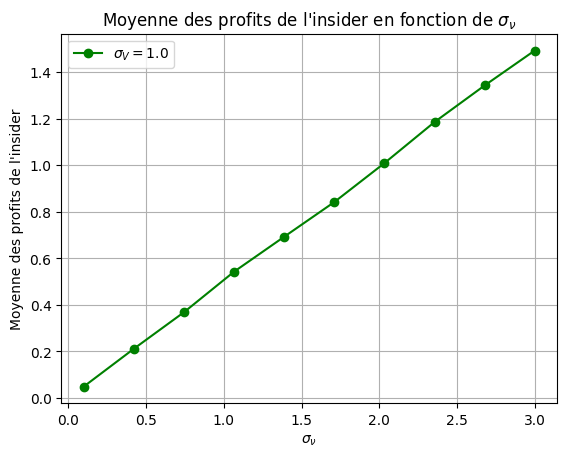

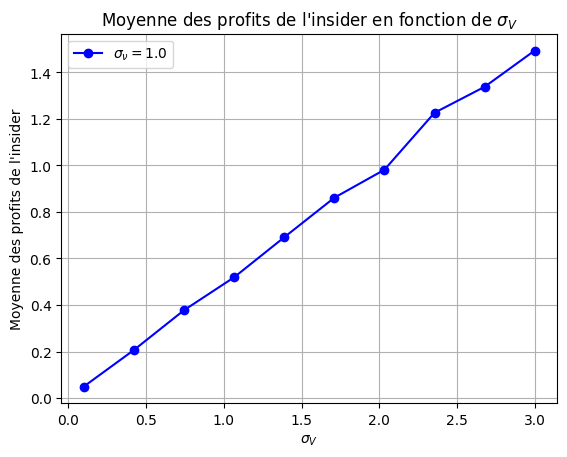

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
n_simulations = 10000  # Nombre de simulations
fixed_sigma_V = 1.0  # Fixer sigma_V à une valeur (par exemple, 1.0)
sigma_nu_values = np.linspace(0.1, 3.0, 10)  # Différentes valeurs pour sigma_nu (de 0.1 à 3.0 avec 10 points)

# Stocker les résultats pour chaque sigma_nu
mean_profits = []

# Simulation pour chaque valeur de sigma_nu
for sigma_nu in sigma_nu_values:
    insider_profits = []
    
    for i in range(n_simulations):
        # Générer V et nu selon les paramètres donnés
        V = np.random.normal(0, fixed_sigma_V)  # Valeur réelle de l'actif
        nu = np.random.normal(0, sigma_nu)  # Demande des noise traders

        # Calculer theta, la quantité échangée par l'insider
        beta = sigma_nu / fixed_sigma_V
        theta = beta * V

        # Calculer la demande totale Y
        Y = theta + nu

        # Calculer le lambda de Kyle et le prix de marché
        lambda_kyle = fixed_sigma_V / (2 * sigma_nu)
        market_price = lambda_kyle * Y

        # Calculer le profit de l'insider
        profit_insider = (V - market_price) * theta

        # Stocker le profit de l'insider
        insider_profits.append(profit_insider)

    # Calculer la moyenne des profits de l'insider pour cette valeur de sigma_nu
    mean_profits.append(np.mean(insider_profits))

# Graphique de la moyenne des profits de l'insider en fonction de sigma_nu
plt.plot(sigma_nu_values, mean_profits, marker='o', linestyle='-', color='green', label=f'$\sigma_V={fixed_sigma_V}$')

plt.title("Moyenne des profits de l'insider en fonction de $\sigma_\\nu$")
plt.xlabel("$\\sigma_\\nu$")
plt.ylabel("Moyenne des profits de l'insider")
plt.grid(True)
plt.legend()
plt.show()
# Fixer sigma_nu et étudier en fonction de sigma_V
fixed_sigma_nu = 1.0  # Fixer sigma_nu à une valeur (par exemple, 1.0)
sigma_V_values = np.linspace(0.1, 3.0, 10)  # Différentes valeurs pour sigma_V (de 0.1 à 3.0 avec 10 points)

mean_profits = []

# Simulation pour chaque valeur de sigma_V
for sigma_V in sigma_V_values:
    insider_profits = []
    
    for i in range(n_simulations):
        # Générer V et nu selon les paramètres donnés
        V = np.random.normal(0, sigma_V)  # Valeur réelle de l'actif
        nu = np.random.normal(0, fixed_sigma_nu)  # Demande des noise traders

        # Calculer theta, la quantité échangée par l'insider
        beta = fixed_sigma_nu / sigma_V
        theta = beta * V

        # Calculer la demande totale Y
        Y = theta + nu

        # Calculer le lambda de Kyle et le prix de marché
        lambda_kyle = sigma_V / (2 * fixed_sigma_nu)
        market_price = lambda_kyle * Y

        # Calculer le profit de l'insider
        profit_insider = (V - market_price) * theta

        # Stocker le profit de l'insider
        insider_profits.append(profit_insider)

    # Calculer la moyenne des profits de l'insider pour cette valeur de sigma_V
    mean_profits.append(np.mean(insider_profits))

# Graphique de la moyenne des profits de l'insider en fonction de sigma_V
plt.plot(sigma_V_values, mean_profits, marker='o', linestyle='-', color='blue', label=f'$\sigma_\\nu={fixed_sigma_nu}$')

plt.title("Moyenne des profits de l'insider en fonction de $\sigma_V$")
plt.xlabel("$\\sigma_V$")
plt.ylabel("Moyenne des profits de l'insider")
plt.grid(True)
plt.legend()
plt.show()

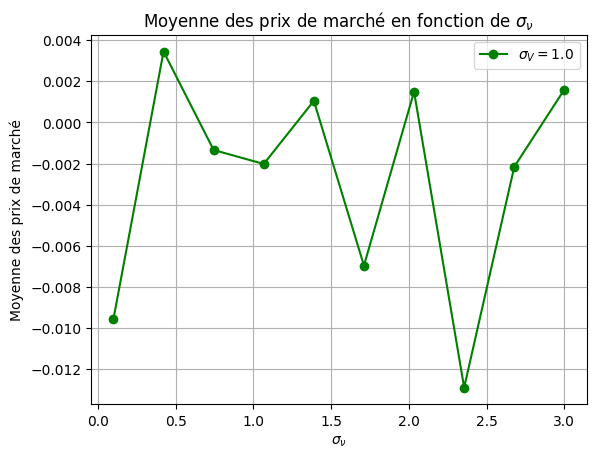

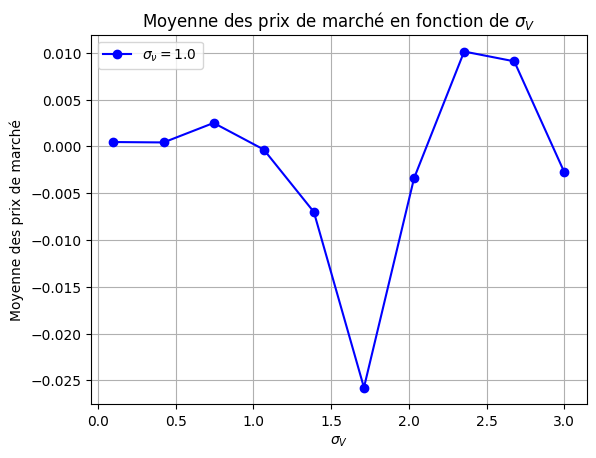

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
n_simulations = 10000  # Nombre de simulations
fixed_sigma_V = 1.0  # Fixer sigma_V à une valeur (par exemple, 1.0)
sigma_nu_values = np.linspace(0.1, 3.0, 10)  # Différentes valeurs pour sigma_nu (de 0.1 à 3.0 avec 10 points)

# Stocker les résultats pour chaque sigma_nu
mean_market_prices = []

# Simulation pour chaque valeur de sigma_nu
for sigma_nu in sigma_nu_values:
    market_prices = []
    
    for i in range(n_simulations):
        # Générer V et nu selon les paramètres donnés
        V = np.random.normal(0, fixed_sigma_V)  # Valeur réelle de l'actif
        nu = np.random.normal(0, sigma_nu)  # Demande des noise traders

        # Calculer theta, la quantité échangée par l'insider
        beta = sigma_nu / fixed_sigma_V
        theta = beta * V

        # Calculer la demande totale Y
        Y = theta + nu

        # Calculer le lambda de Kyle et le prix de marché
        lambda_kyle = fixed_sigma_V / (2 * sigma_nu)
        market_price = lambda_kyle * Y

        # Stocker le prix de marché
        market_prices.append(market_price)

    # Calculer la moyenne des prix de marché pour cette valeur de sigma_nu
    mean_market_prices.append(np.mean(market_prices))

# Graphique de la moyenne des prix de marché en fonction de sigma_nu
plt.plot(sigma_nu_values, mean_market_prices, marker='o', linestyle='-', color='green', label=f'$\sigma_V={fixed_sigma_V}$')

plt.title("Moyenne des prix de marché en fonction de $\sigma_\\nu$")
plt.xlabel("$\\sigma_\\nu$")
plt.ylabel("Moyenne des prix de marché")
plt.grid(True)
plt.legend()
plt.show()
# Fixer sigma_nu et étudier en fonction de sigma_V
fixed_sigma_nu = 1.0  # Fixer sigma_nu à une valeur (par exemple, 1.0)
sigma_V_values = np.linspace(0.1, 3.0, 10)  # Différentes valeurs pour sigma_V (de 0.1 à 3.0 avec 10 points)

mean_market_prices = []

# Simulation pour chaque valeur de sigma_V
for sigma_V in sigma_V_values:
    market_prices = []
    
    for i in range(n_simulations):
        # Générer V et nu selon les paramètres donnés
        V = np.random.normal(0, sigma_V)  # Valeur réelle de l'actif
        nu = np.random.normal(0, fixed_sigma_nu)  # Demande des noise traders

        # Calculer theta, la quantité échangée par l'insider
        beta = fixed_sigma_nu / sigma_V
        theta = beta * V

        # Calculer la demande totale Y
        Y = theta + nu

        # Calculer le lambda de Kyle et le prix de marché
        lambda_kyle = sigma_V / (2 * fixed_sigma_nu)
        market_price = lambda_kyle * Y

        # Stocker le prix de marché
        market_prices.append(market_price)

    # Calculer la moyenne des prix de marché pour cette valeur de sigma_V
    mean_market_prices.append(np.mean(market_prices))

# Graphique de la moyenne des prix de marché en fonction de sigma_V
plt.plot(sigma_V_values, mean_market_prices, marker='o', linestyle='-', color='blue', label=f'$\sigma_\\nu={fixed_sigma_nu}$')

plt.title("Moyenne des prix de marché en fonction de $\sigma_V$")
plt.xlabel("$\\sigma_V$")
plt.ylabel("Moyenne des prix de marché")
plt.grid(True)
plt.legend()
plt.show()

# Mesurer la Performance du Marché à l'aide de la Mesure de Liquidité

## Contexte
Dans le modèle de Kyle, la **liquidité** du marché peut être mesurée à l'aide de **$\lambda$ de Kyle**. Cette valeur mesure la sensibilité du prix du marché à la demande totale observée par les **market makers**. Un marché est considéré comme **moins liquide** si $\lambda$ est élevé, ce qui signifie qu'une petite quantité de transactions peut entraîner un changement important du prix. 

Un **$\lambda$** faible indique un marché **plus liquide**, où les transactions n'ont qu'un faible impact sur les prix.

## Formule pour $\lambda$ de Kyle

La formule pour $\lambda$ dans le modèle de Kyle est donnée par :

$$
\lambda = \frac{\sigma_V}{2 \sigma_\nu}
$$

- $\sigma_V$ : Volatilité de la valeur de l'actif.
- $\sigma_\nu$ : Volatilité des ordres des **noise traders**.

### Interprétation :
- Si **$\sigma_\nu$** est faible, la volatilité des traders bruités est faible, ce qui signifie moins de transactions et une plus grande sensibilité des prix. Dans ce cas, **$\lambda$** sera élevé, indiquant une **faible liquidité**.
- Si **$\sigma_\nu$** est élevé, il y a plus de transactions bruitées, ce qui rend le marché **plus liquide** (faible impact des transactions sur le prix), donc **$\lambda$** sera faible.

## Objectif
Nous allons calculer **$\lambda$** pour différentes valeurs de $\sigma_V$ et $\sigma_\nu$, puis visualiser comment la **liquidité** du marché change en fonction de la volatilité des traders bruités.

## Code pour mesurer la liquidité
Voici le code pour simuler **$\lambda$ de Kyle** pour différentes valeurs de $\sigma_V$ et $\sigma_\nu$, puis tracer la relation entre $\lambda$ et $\sigma_\nu$.

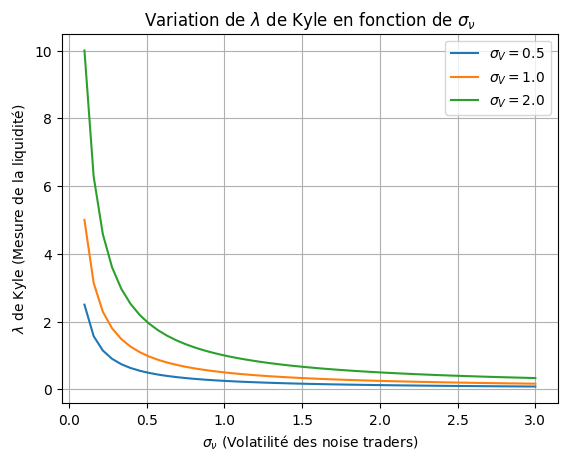

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Paramètres de la simulation
sigma_V_values = [0.5, 1.0, 2.0]  # Différentes volatilités pour V
sigma_nu_values = np.linspace(0.1, 3.0, 50)  # Différentes valeurs pour sigma_nu

# Stocker les résultats de lambda pour chaque combinaison de sigma_V et sigma_nu
lambdas = {}

# Calculer lambda de Kyle pour chaque combinaison de sigma_V et sigma_nu
for sigma_V in sigma_V_values:
    lambdas[sigma_V] = []
    for sigma_nu in sigma_nu_values:
        # Calculer lambda de Kyle
        lambda_kyle = sigma_V / (2 * sigma_nu)
        lambdas[sigma_V].append(lambda_kyle)

# Tracer les résultats pour chaque sigma_V
for sigma_V in sigma_V_values:
    plt.plot(sigma_nu_values, lambdas[sigma_V], label=f'$\sigma_V={sigma_V}$')

# Ajout des détails du graphique
plt.title("Variation de $\lambda$ de Kyle en fonction de $\sigma_\\nu$")
plt.xlabel("$\\sigma_\\nu$ (Volatilité des noise traders)")
plt.ylabel("$\\lambda$ de Kyle (Mesure de la liquidité)")
plt.legend()
plt.grid(True)
plt.show()


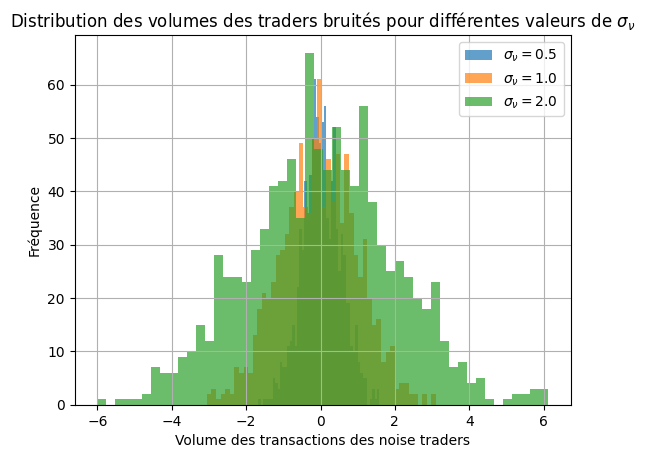

In [17]:
# Visualisation des volumes des noise traders
n_simulations = 1000
sigma_nu_values = [0.5, 1.0, 2.0]  # Différentes valeurs de sigma_nu
transaction_volumes = {}

for sigma_nu in sigma_nu_values:
    noise_trades = []
    for i in range(n_simulations):
        nu = np.random.normal(0, sigma_nu)  # Générer des volumes de noise traders
        noise_trades.append(nu)
    transaction_volumes[sigma_nu] = noise_trades

# Tracer les résultats
for sigma_nu in sigma_nu_values:
    plt.hist(transaction_volumes[sigma_nu], bins=50, alpha=0.7, label=f'$\sigma_\\nu={sigma_nu}$')

# Ajout des détails du graphique
plt.title("Distribution des volumes des traders bruités pour différentes valeurs de $\sigma_\\nu$")
plt.xlabel("Volume des transactions des noise traders")
plt.ylabel("Fréquence")
plt.legend()
plt.grid(True)
plt.show()

# Implémentation du Modèle de Kyle sans Supposer de Linéarité

## Contexte

Dans le modèle de Kyle, nous avons deux acteurs principaux :

1. **L'insider**, qui connaît la valeur de l'actif $P$ et cherche à maximiser son profit en fonction du **volume d'ordres $V$** qu'il place sur le marché.
2. **Les market makers**, qui observent la demande totale $Y = V + n$ (où $n$ représente les **noise traders**) et fixent un prix de marché $h(Y)$ de manière à minimiser leurs pertes.

L'objectif est de formuler ce problème en termes d'optimisation, sans supposer de relation linéaire, afin de pouvoir résoudre ce problème à l'aide de solveurs.

## Notations

- **$P$** : Valeur de l'actif.
- **$n$** : Ordres des traders bruités (**noise traders**).
- **$V$** : Volume d'ordres de l'insider.
- Pour un tirage possible $\omega$, on note $P_\omega$ et $n_\omega$ les valeurs spécifiques de $P$ et $n$ au tirage $\omega$.

## Problème d'optimisation de l'insider

L'insider connaît la **valeur de l'actif $P$** au temps $t = 0$ et veut maximiser ses **profits** en fonction de son **volume d'ordres $V$**. Le prix de marché fixé par les market makers dépend de la demande totale observée, $Y = V + n$.

### Profit de l'insider

Pour un tirage $\omega$, le profit de l'insider est donné par :

$$
\text{Profit}_\text{insider} = (P_\omega - h(Y_\omega)) \cdot V
$$

où :

- $P_\omega$ est la valeur réelle de l'actif au tirage $\omega$.
- $Y_\omega = V + n_\omega$ est la demande totale observée par les market makers au tirage $\omega$.
- $h(Y_\omega)$ est le prix fixé par les market makers au tirage $\omega$.

### Problème de maximisation de l'insider

L'insider cherche à maximiser son profit en choisissant $V$ :

$$
\max_V \mathbb{E}\left[ (P_\omega - h(V + n_\omega)) \cdot V \right]
$$

## Problème d'optimisation des market makers

Les **market makers** sont en concurrence et fixent un prix $h(Y)$ basé sur la demande totale $Y = V + n$ pour minimiser leur **espérance de perte**. Ils ajustent le prix pour que leur profit espéré soit nul.

### Profit des market makers

Le profit d'un market maker est donné par :

$$
\text{Profit}_\text{MM} = h(Y_\omega) - P_\omega
$$

### Problème de minimisation des market makers

Les market makers cherchent à minimiser leur perte moyenne :

$$
\min_h \mathbb{E}\left[ (h(V + n_\omega) - P_\omega)^2 \right]
$$

Ils ajustent donc $h(Y)$ de manière à minimiser l'écart moyen entre le prix qu'ils fixent $h(Y_\omega)$ et la valeur réelle de l'actif $P_\omega$.

---

## Implémentation Numérique avec SciPy

Dans cette section, nous allons implémenter le modèle de Kyle en Python en utilisant les bibliothèques NumPy et SciPy. Nous allons résoudre numériquement le problème d'optimisation sans supposer de linéarité.

### Étapes de l'implémentation

1. **Simuler des échantillons pour $P$ et $n$** : Nous allons générer des valeurs pour $P$ (la valeur de l'actif) et $n$ (les ordres des noise traders) en supposant des distributions données.

2. **Définir le prix $h(Y)$ fixé par les market makers** : Les market makers fixent le prix en fonction de $Y = V + n$. Nous allons déterminer $h(Y)$ en résolvant leur problème d'optimisation.

3. **Résoudre le problème d'optimisation de l'insider** : L'insider choisit $V$ pour maximiser son profit. Nous allons utiliser un solveur pour trouver la valeur optimale de $V$.

4. **Vérifier les résultats et comparer avec les formules théoriques** : Nous allons comparer les résultats obtenus numériquement avec les formules théoriques du modèle de Kyle.

---

## 1. Importation des Bibliothèques

Tout d'abord, importons les bibliothèques nécessaires.

```python
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt


# Implémentation du Modèle de Kyle sans Supposer de Linéarité

## Contexte

Dans le modèle de Kyle, nous modélisons le comportement d'un **trader informé** (l'insider) qui connaît la valeur réelle d'un actif financier, et des **market makers** qui déterminent le prix de l'actif en fonction de la demande totale observée sur le marché. Les **traders bruités** (ou **noise traders**) soumettent des ordres aléatoires indépendamment de l'information sur la valeur de l'actif.

L'objectif est de formuler le problème d'optimisation de l'insider et des market makers sans supposer de relation linéaire, afin de résoudre le problème à l'aide de méthodes numériques.

---

## Notations

- $ P $ : Valeur réelle de l'actif (variable aléatoire).
- $ n $ : Volume des ordres des traders bruités (variable aléatoire).
- $ V $ : Volume d'ordre choisi par l'insider (variable à déterminer).
- $ Y $ : Demande totale observée par les market makers, avec $ Y = V + n $.
- $ h(Y) $ : Prix fixé par les market makers en fonction de la demande totale $ Y $.

---

## Problème d'Optimisation de l'Insider

### Objectif de l'Insider

L'insider cherche à maximiser son profit attendu en choisissant le volume d'ordre $ V $ en fonction de sa connaissance de $ P $.

### Profit de l'Insider

Pour chaque réalisation possible (scénario) du marché, le profit de l'insider est donné par :

$
\text{Profit}_{\text{insider}} = (P - h(Y)) \cdot V
$

### Problème de Maximisation

L'insider cherche à résoudre :

$
\max_V \ \mathbb{E}\left[ (P - h(V + n)) \cdot V \right]
$

où l'espérance est prise sur les réalisations possibles de $ n $.

### Condition d'Optimalité

Pour trouver le $ V $ optimal, nous calculons la dérivée du profit attendu par rapport à $ V $ et l'égalisons à zéro :

$
\frac{\partial}{\partial V} \mathbb{E}\left[ (P - h(V + n)) \cdot V \right] = 0
$

En développant, nous obtenons la condition du premier ordre :

$
\mathbb{E}\left[ (P - h(Y)) - V \cdot h'(Y) \right] = 0
$

---

## Problème d'Optimisation des Market Makers

### Objectif des Market Makers

Les market makers fixent le prix $ h(Y) $ en fonction de la demande totale $ Y $ pour que leur profit espéré soit nul, en raison de la concurrence parfaite (compétition à la Bertrand) et de leur neutralité au risque.

### Profit des Market Makers

Le profit d'un market maker est donné par :

$
\text{Profit}_{\text{MM}} = (h(Y) - P) \cdot Y
$

### Condition de Profit Nul

Les market makers cherchent à satisfaire :

$
\mathbb{E}\left[ (h(Y) - P) \cdot Y \right] = 0
$

---

## Formulation des Conditions d'Équilibre

### 1. Condition d'Optimalité de l'Insider

$
\mathbb{E}\left[ (P - h(Y)) - V \cdot h'(Y) \right] = 0
$

### 2. Condition de Profit Nul des Market Makers

$
\mathbb{E}\left[ (h(Y) - P) \cdot Y \right] = 0
$

---

## Mise en Œuvre Numérique

### Hypothèses pour l'Implémentation

- **Simulations** : Nous allons simuler un grand nombre de réalisations pour $ P $ et $ n $ selon leurs distributions respectives.
- **Paramétrisation** : Nous pouvons approximer $ V(P) $ et $ h(Y) $ par des fonctions paramétriques sans supposer de linéarité a priori.

### Discrétisation des Conditions

Pour chaque simulation (indice $ i $) :

1. **Calcul du Profit de l'Insider** :

   $
   \text{Profit}_{\text{insider}}^{(i)} = (P^{(i)} - h(Y^{(i)})) \cdot V^{(i)}
   $

2. **Calcul du Profit du Market Maker** :

   $
   \text{Profit}_{\text{MM}}^{(i)} = (h(Y^{(i)}) - P^{(i)}) \cdot Y^{(i)}
   $

### Conditions Moyennes

En prenant la moyenne sur toutes les simulations :

1. **Condition de l'Insider** :

   $
   \frac{1}{N} \sum_{i=1}^{N} \left[ (P^{(i)} - h(Y^{(i)})) - V^{(i)} \cdot h'(Y^{(i)}) \right] = 0
   $

2. **Condition du Market Maker** :

   $
   \frac{1}{N} \sum_{i=1}^{N} \left[ (h(Y^{(i)}) - P^{(i)}) \cdot Y^{(i)} \right] = 0
   $

où $ N $ est le nombre total de simulations.

---

## Fonction Objectif pour l'Optimisation Numérique

Nous définissons une fonction objectif qui mesure l'écart par rapport aux conditions d'équilibre :

$
\text{Objectif} = \left( \frac{1}{N} \sum_{i=1}^{N} \left[ (P^{(i)} - h(Y^{(i)})) - V^{(i)} \cdot h'(Y^{(i)}) \right] \right)^2 + \left( \frac{1}{N} \sum_{i=1}^{N} \left[ (h(Y^{(i)}) - P^{(i)}) \cdot Y^{(i)} \right] \right)^2
$

L'objectif est de trouver les paramètres de $ V(P) $ et $ h(Y) $ qui minimisent cette fonction.

---

## Approche Numérique

### 1. Paramétrisation de $ V(P) $ et $ h(Y) $

- **Sans supposer de linéarité**, nous pouvons paramétrer :

  - $ V(P) = \beta_0 + \beta_1 P + \beta_2 P^2 + \dots $
  - $ h(Y) = a_0 + a_1 Y + a_2 Y^2 + \dots $

### 2. Calcul des Dérivées

- Pour la condition de l'insider, nous avons besoin de $ h'(Y) $, qui peut être calculé en fonction de la paramétrisation choisie pour $ h(Y) $.

### 3. Optimisation Numérique

- Nous utilisons un solveur numérique (par exemple, **SciPy**) pour minimiser la fonction objectif en ajustant les paramètres de $ V(P) $ et $ h(Y) $.
- Des contraintes peuvent être ajoutées (par exemple, $ V(P) $ doit être positif, $ h(Y) $ doit être croissante, etc.).

---

## Validation des Résultats

### Comparaison avec les Solutions Théoriques

- **Dans le cas linéaire**, les solutions théoriques du modèle de Kyle sont :

  $
  V(P) = \beta P, \quad h(Y) = \lambda Y
  $

  avec :

  $
  \beta = \frac{\sigma_n}{\sigma_P}, \quad \lambda = \frac{\sigma_P}{2 \sigma_n}
  $

- En comparant les résultats numériques avec ces solutions, nous pouvons vérifier la validité de notre implémentation.

### Analyse des Profits

- **Profit Moyen de l'Insider** : Doit être positif, reflétant l'avantage informationnel.
- **Profit Moyen des Market Makers** : Doit être nul ou proche de zéro en raison de la concurrence parfaite.

---

## Étapes Suivantes

1. **Implémenter le Code Numérique** : Traduire cette approche en code Python avec NumPy et SciPy.
2. **Tester Différentes Paramétrisations** : Essayer diverses formes pour $ V(P) $ et $ h(Y) $.
3. **Simulations Monte Carlo** : Estimer les distributions des profits et vérifier les conditions d'équilibre.
4. **Étendre le Modèle** : Ajouter des complexités telles que plusieurs insiders, aversion au risque, etc.

---

## Conclusion

En formulant le modèle de Kyle sans supposer de linéarité et en résolvant numériquement les problèmes d'optimisation, nous explorons plus en profondeur le comportement des acteurs sur le marché financier en présence d'asymétrie d'information. Cette approche permet de vérifier les solutions théoriques et d'étudier l'impact de différentes hypothèses sur les résultats.

---

**Remarque** : La prochaine étape consiste à implémenter ce modèle en Python, en suivant les étapes décrites et en utilisant les bibliothèques appropriées pour l'optimisation numérique et les simulations.


In [1]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
# Fixer la graine aléatoire pour la reproductibilité
np.random.seed(42)

# Paramètres
sigma_P = 1.0   # Écart-type de P (valeur de l'actif)
sigma_n = 1.0   # Écart-type de n (ordres des noise traders)
N = 10000       # Nombre de simulations


In [3]:
# Générer les données simulées pour P et n
P_samples = np.random.normal(0, sigma_P, N)
n_samples = np.random.normal(0, sigma_n, N)

In [5]:
def objective(params):
    a, lambda_, beta = params
    
    # Calcul du volume d'ordre de l'insider pour chaque simulation
    V = beta * P_samples
    
    # Calcul de la demande totale observée par les market makers
    Y = V + n_samples
    
    # Calcul du prix fixé par les market makers
    h_Y = a + lambda_ * Y
    
    # Condition d'optimalité de l'insider (dérivée du profit par rapport à V)
    d_profit_dV = P_samples - h_Y - lambda_ * V
    
    insider_condition = np.mean(d_profit_dV)
    
    # Condition de profit nul des market makers
    market_maker_condition = np.mean((h_Y - P_samples) * Y)
    
    # Fonction objectif à minimiser (somme des carrés des conditions)
    return insider_condition**2 + market_maker_condition**2


In [6]:
# Initialisation des paramètres
initial_params = [0.0, 0.5, 0.5]  # [a, lambda, beta]

# Contraintes : lambda et beta doivent être positifs
bounds = [(-np.inf, np.inf), (0, np.inf), (0, np.inf)]  # [a, lambda, beta]

# Résolution du problème d'optimisation
result = minimize(objective, initial_params, bounds=bounds)

# Extraction des résultats optimaux
a_opt, lambda_opt, beta_opt = result.x

print("Résultats optimaux :")
print(f"a = {a_opt}")
print(f"lambda = {lambda_opt}")
print(f"beta = {beta_opt}")

Résultats optimaux :
a = -0.0067922605758770965
lambda = 0.4140156483462556
beta = 0.5354518292640481


In [7]:
beta_theoretical = sigma_n / sigma_P
lambda_theoretical = sigma_P / (2 * sigma_n)
a_theoretical = 0

print("\nValeurs théoriques :")
print(f"a = {a_theoretical}")
print(f"lambda = {lambda_theoretical}")
print(f"beta = {beta_theoretical}")


Valeurs théoriques :
a = 0
lambda = 0.5
beta = 1.0


In [8]:
print("\nComparaison des résultats :")
print(f"Différence en a : {a_opt - a_theoretical}")
print(f"Différence en lambda : {lambda_opt - lambda_theoretical}")
print(f"Différence en beta : {beta_opt - beta_theoretical}")


Comparaison des résultats :
Différence en a : -0.0067922605758770965
Différence en lambda : -0.0859843516537444
Différence en beta : -0.4645481707359519


In [9]:
# Recalculer V et h(Y) avec les paramètres optimaux
V_opt = beta_opt * P_samples
Y_opt = V_opt + n_samples
h_Y_opt = a_opt + lambda_opt * Y_opt

# Profits
profit_insider_opt = (P_samples - h_Y_opt) * V_opt
profit_market_makers_opt = (h_Y_opt - P_samples) * Y_opt

# Profits moyens
mean_profit_insider = np.mean(profit_insider_opt)
mean_profit_market_makers = np.mean(profit_market_makers_opt)

print("\nProfits moyens :")
print(f"Profit moyen de l'insider : {mean_profit_insider}")
print(f"Profit moyen des market makers : {mean_profit_market_makers}")


Profits moyens :
Profit moyen de l'insider : 0.4215038943665146
Profit moyen des market makers : 1.6672129722294925e-08


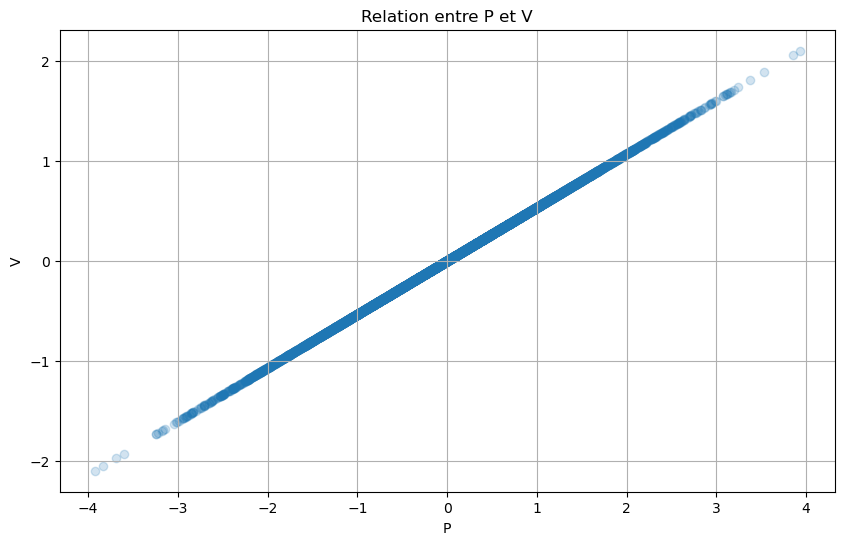

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(P_samples, V_opt, alpha=0.2)
plt.title("Relation entre P et V")
plt.xlabel("P")
plt.ylabel("V")
plt.grid(True)
plt.show()

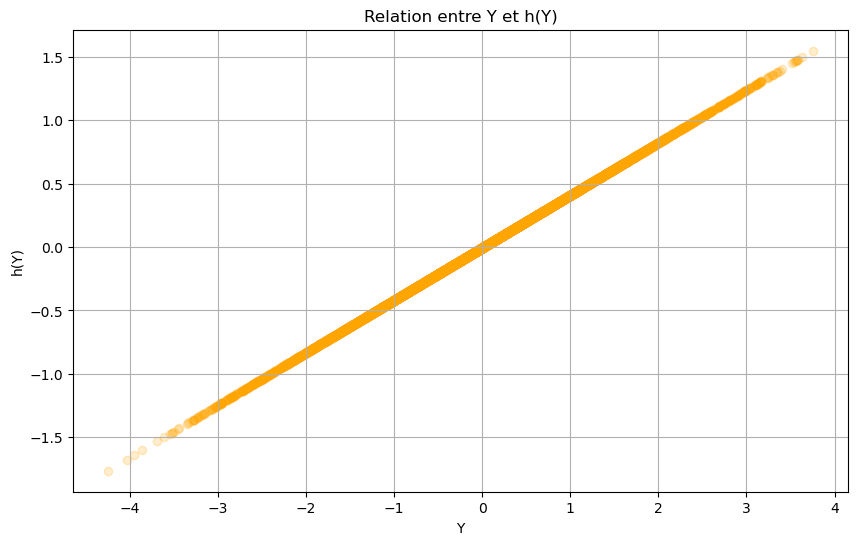

In [11]:
plt.figure(figsize=(10, 6))
plt.scatter(Y_opt, h_Y_opt, alpha=0.2, color='orange')
plt.title("Relation entre Y et h(Y)")
plt.xlabel("Y")
plt.ylabel("h(Y)")
plt.grid(True)
plt.show()

In [12]:
def objective_nonlinear(params):
    a0, a1, a2, beta0, beta1, beta2 = params
    
    # Calcul du volume d'ordre de l'insider pour chaque simulation
    V = beta0 + beta1 * P_samples + beta2 * P_samples**2
    
    # Calcul de la demande totale observée par les market makers
    Y = V + n_samples
    
    # Calcul du prix fixé par les market makers
    h_Y = a0 + a1 * Y + a2 * Y**2
    
    # Calcul de la dérivée de h(Y) par rapport à Y
    h_Y_derivative = a1 + 2 * a2 * Y
    
    # Condition d'optimalité de l'insider
    d_profit_dV = P_samples - h_Y - h_Y_derivative * V
    
    insider_condition = np.mean(d_profit_dV)
    
    # Condition de profit nul des market makers
    market_maker_condition = np.mean((h_Y - P_samples) * Y)
    
    # Fonction objectif à minimiser
    return insider_condition**2 + market_maker_condition**2

In [13]:
# Initialisation des paramètres
initial_params_nonlinear = [0.0, 0.5, 0.0, 0.0, 0.5, 0.0]  # [a0, a1, a2, beta0, beta1, beta2]

# Résolution du problème d'optimisation
result_nonlinear = minimize(objective_nonlinear, initial_params_nonlinear)

# Extraction des résultats optimaux
a0_opt, a1_opt, a2_opt, beta0_opt, beta1_opt, beta2_opt = result_nonlinear.x

print("\nRésultats optimaux (non linéaire) :")
print(f"a0 = {a0_opt}")
print(f"a1 = {a1_opt}")
print(f"a2 = {a2_opt}")
print(f"beta0 = {beta0_opt}")
print(f"beta1 = {beta1_opt}")
print(f"beta2 = {beta2_opt}")


Résultats optimaux (non linéaire) :
a0 = -0.0004832221784453471
a1 = 0.4140004181652197
a2 = -0.0022707539063021994
beta0 = -0.0011230365273280447
beta1 = 0.5353389104832986
beta2 = -0.0014153220831415226


In [14]:
# Recalculer V et h(Y) avec les paramètres optimaux non linéaires
V_nl = beta0_opt + beta1_opt * P_samples + beta2_opt * P_samples**2
Y_nl = V_nl + n_samples
h_Y_nl = a0_opt + a1_opt * Y_nl + a2_opt * Y_nl**2

# Profits
profit_insider_nl = (P_samples - h_Y_nl) * V_nl
profit_market_makers_nl = (h_Y_nl - P_samples) * Y_nl

# Profits moyens
mean_profit_insider_nl = np.mean(profit_insider_nl)
mean_profit_market_makers_nl = np.mean(profit_market_makers_nl)

print("\nProfits moyens (non linéaire) :")
print(f"Profit moyen de l'insider : {mean_profit_insider_nl}")
print(f"Profit moyen des market makers : {mean_profit_market_makers_nl}")


Profits moyens (non linéaire) :
Profit moyen de l'insider : 0.42147674545890934
Profit moyen des market makers : -7.362688120871042e-08


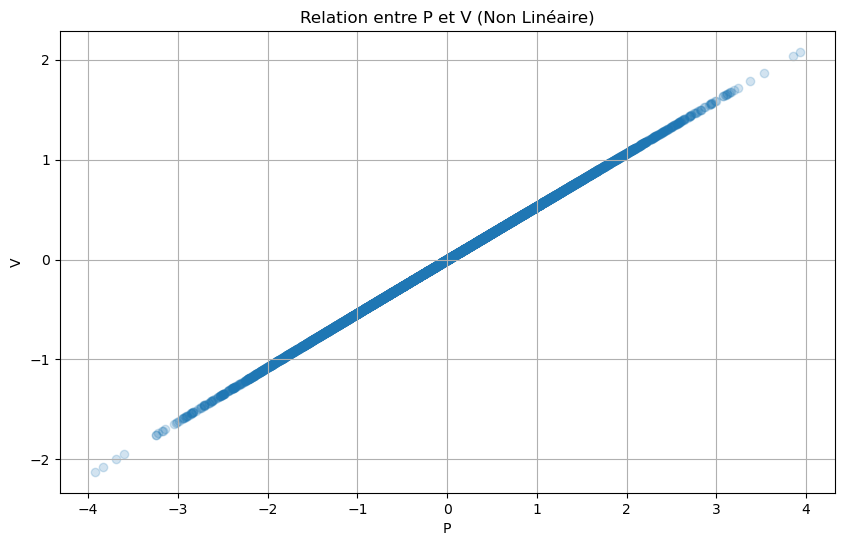

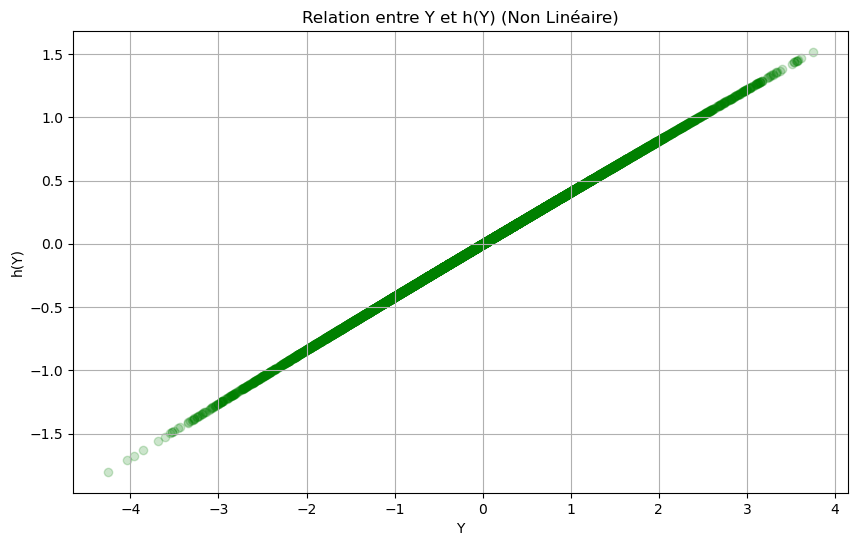

In [15]:
# Relation entre P et V (non linéaire)
plt.figure(figsize=(10, 6))
plt.scatter(P_samples, V_nl, alpha=0.2)
plt.title("Relation entre P et V (Non Linéaire)")
plt.xlabel("P")
plt.ylabel("V")
plt.grid(True)
plt.show()

# Relation entre Y et h(Y) (non linéaire)
plt.figure(figsize=(10, 6))
plt.scatter(Y_nl, h_Y_nl, alpha=0.2, color='green')
plt.title("Relation entre Y et h(Y) (Non Linéaire)")
plt.xlabel("Y")
plt.ylabel("h(Y)")
plt.grid(True)
plt.show()